In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.widgets import Slider
import matplotlib.patches as mpatches
import ect

In [4]:
G = nx.Graph()

'''
This block just lists a collection of embedded graphs to test the visualization on and shows the graph in 
    regular matplotlib + networkx fashion
'''

# # single angle 
# pos = {0: (0,0), 1: (-1,1), 2: (1,1)}
# edges = [(0, 1), (0, 2)]

# # T
# pos = {0: (-1, 0), 1: (0, 0), 2: (1, 0), 3: (0, -1)}
# edges = [(0, 1), (1, 2), (1, 3)]

# # asymm T
# pos = {0: (-1, 0), 1: (0, 0), 2: (.5, -.5), 3: (0, -1)}
# edges = [(0, 1), (1, 2), (1, 3)]

# "cup"
# pos = {0: (-2,1), 1: (-1,0), 2: (1,0), 3: (2,1)}
# edges = [(0, 1), (1, 2), (2,3)]

# + with hanging edge
pos = {0: (0,0), 1: (-1,0), 2: (0,1), 3: (1,0), 4:(0, -1), 5:(1, 1)}
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (2,5)]

# # more difficult test case
# pos = {0: (0,0), 1: (-np.sqrt(2)/2,-np.sqrt(2)/2), 2: (-np.sqrt(2)/2,np.sqrt(2)/2), 3: (1,0), 4: (1, -np.sqrt(2)/2),
#        5: (1+np.sqrt(2)/2, 0)}
# edges = [(0, 1), (0, 2), (0,3), (3,4), (3,5)]


# # symm angle 
# pos = {0: (0,0), 1: (-1,1), 2: (1,1), 3: (0,1)}
# edges = [(0, 1), (0, 2), (0,3)]

# displays graph
G.add_nodes_from(pos.keys())
plt.axis('equal')
nx.set_node_attributes(G, pos, 'pos')
G.add_edges_from(edges)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, ax = None)


<IPython.core.display.Javascript object>


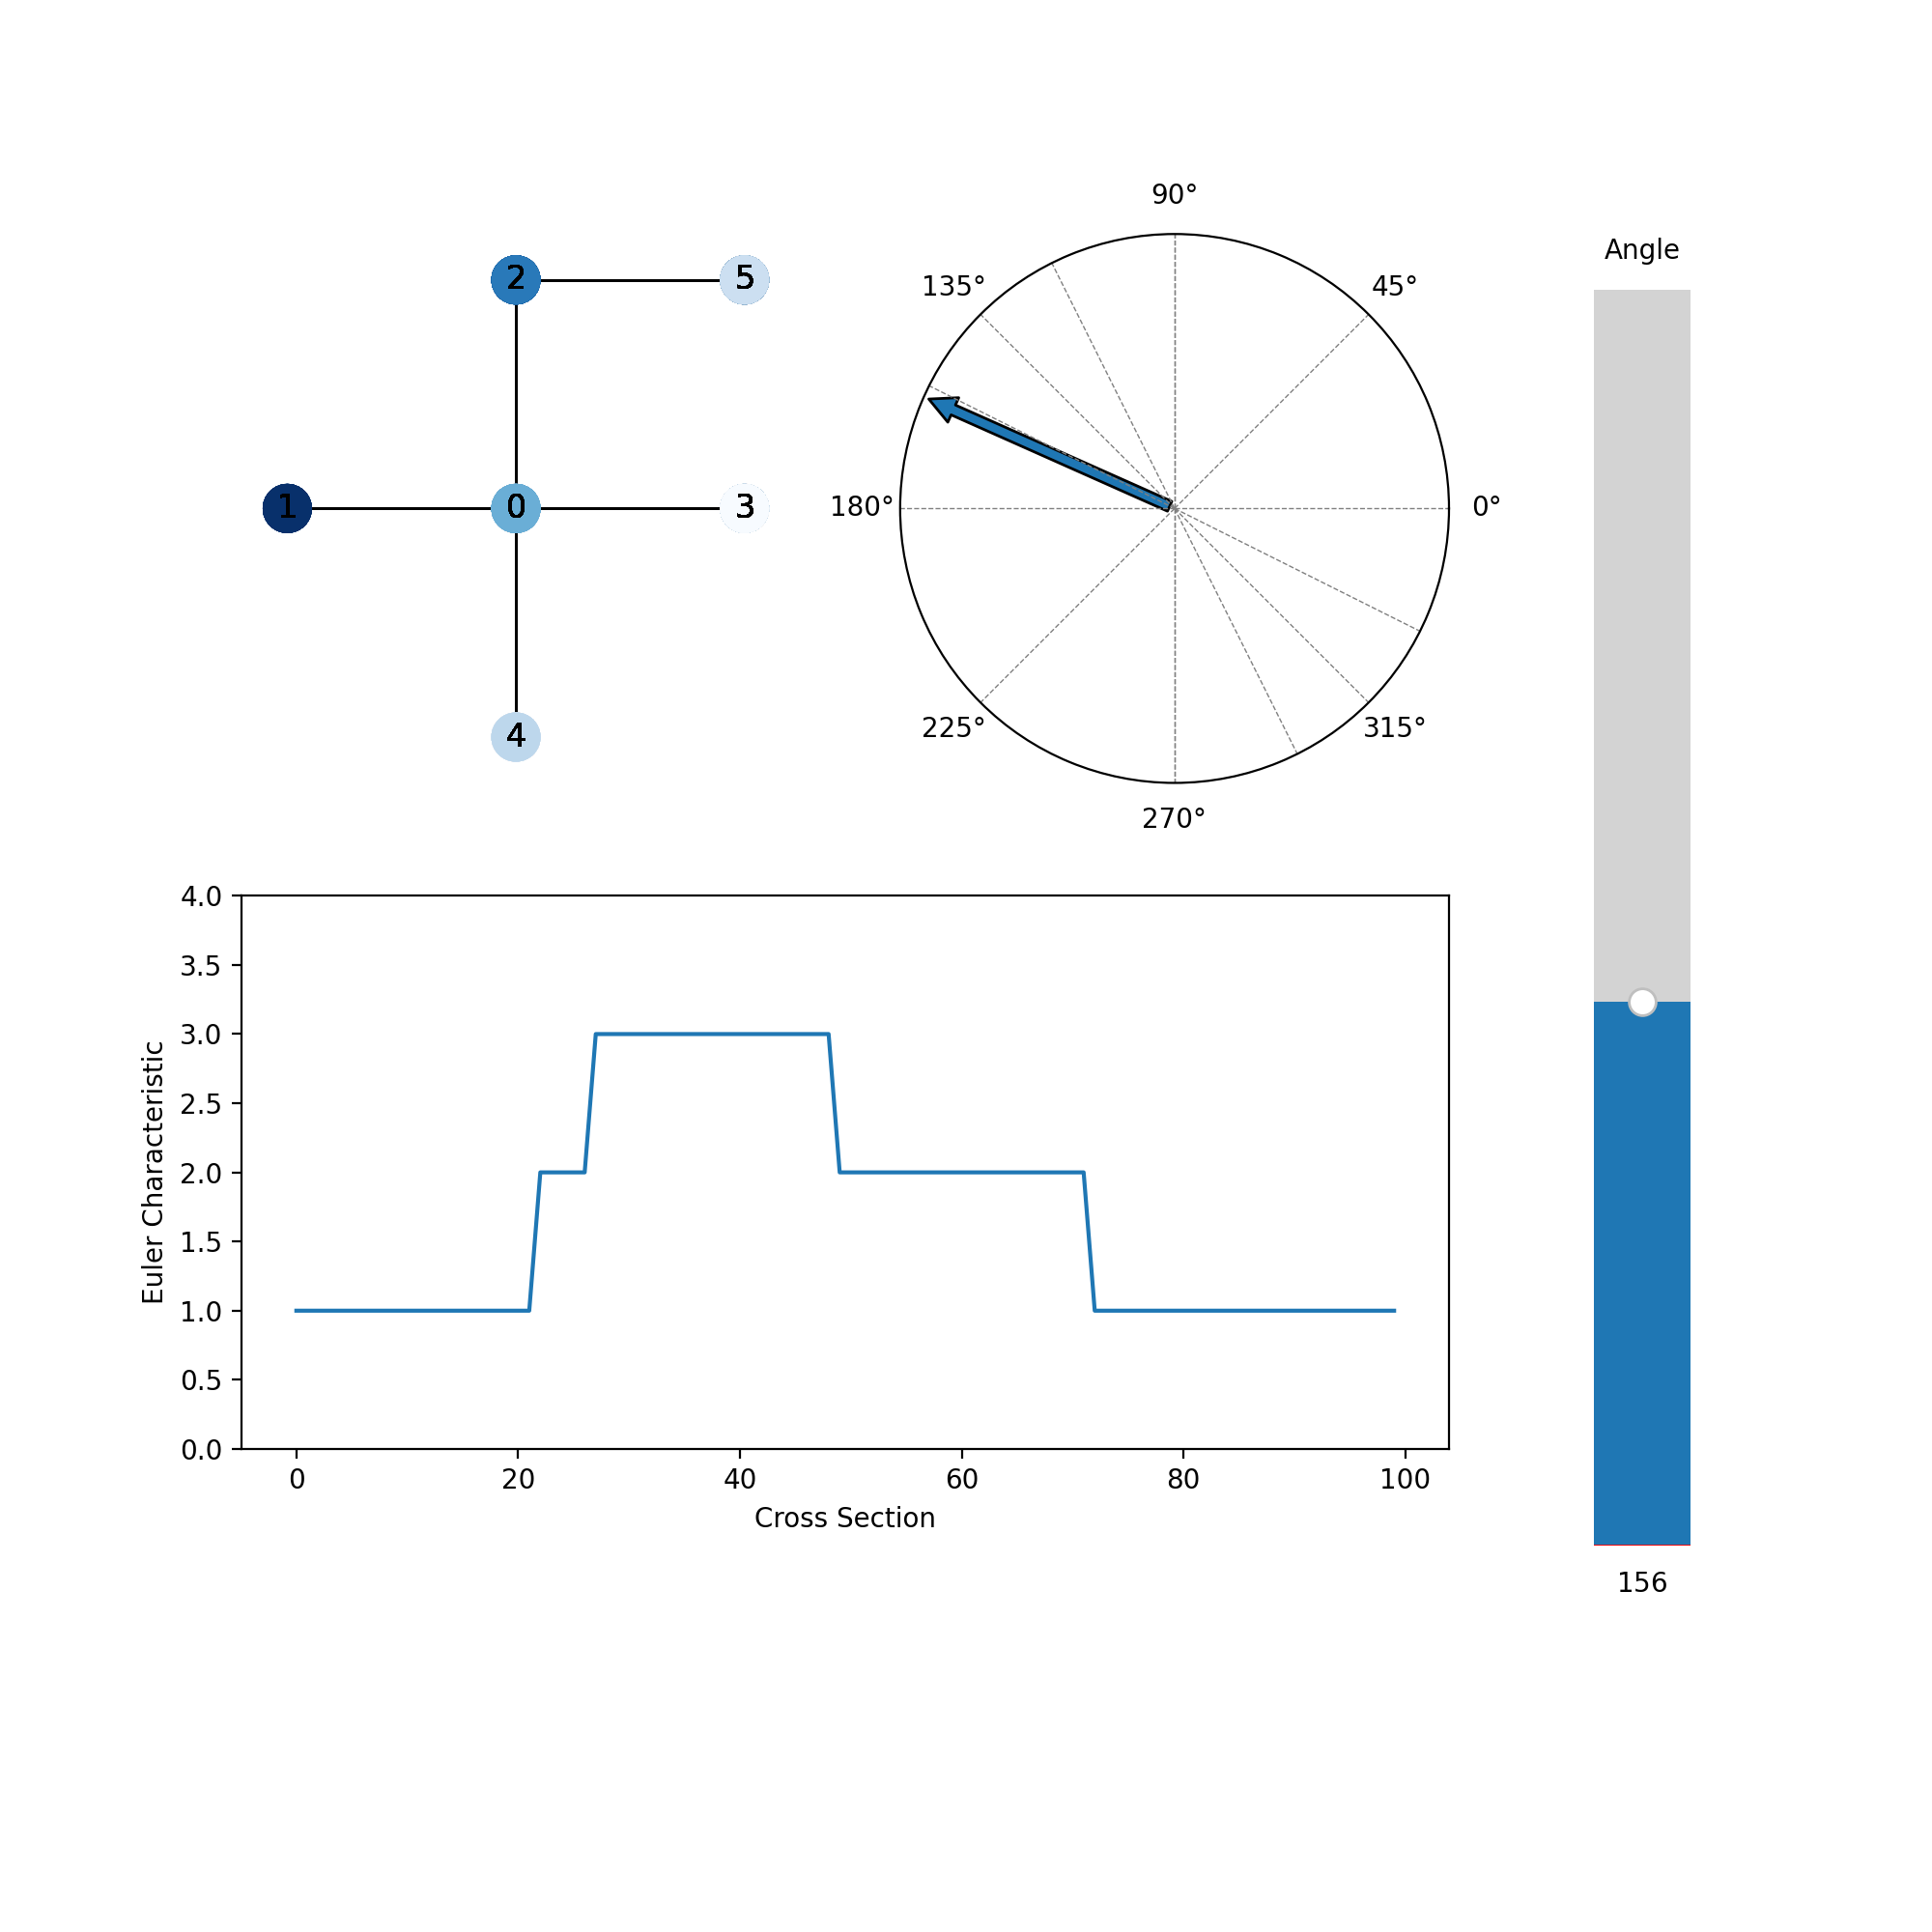

0

In [5]:
# requires 'pip install ipympl'
%matplotlib notebook

############### USER INITIALIZATION ###################

# euler curve resolution (how many samples to take linearly between min and max height)
T = 100
# slider resolution
dtheta = 2

############### FIGURE INITIALIZATION ##################
fig = plt.figure(figsize = (10,10))

# setting up subplots this way allows for the 2nd to be in polar coordinates
spec = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1], projection = 'polar')
ax2 = fig.add_subplot(spec[1, :])
fig.subplots_adjust(bottom=0.25, right = 0.75)
ax0.axis('equal')
# in polar (theta, r)
ax1.set_xlim(0,2*np.pi)
ax1.set_ylim(0,1)

# add slider 
ang_ax = fig.add_axes([0.8, 0.2, 0.1, 0.65])
ang_slider = Slider(
    ax=ang_ax,
    label="Angle",
    valmin=0,
    valmax=360,
    valinit=0,
    valstep = dtheta,
    orientation = 'vertical'
)

############### PLOT INITIAL FRAME ####################

# set initial angle and get euler curve for that angle 
theta = 0
ecc = ect.compute_ect(G, theta, T).flatten()

line, = ax2.plot(ecc)

ect.plot_directional_distance(G, theta, ax = ax0)

# arrow to tell direction
x_tail = .5
y_tail = .5
x_head = x_tail + np.cos(theta)/2
y_head = y_tail + np.sin(theta)/2
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=20, transform=ax1.transAxes)
ax1.add_patch(arrow)
# clean up polar axes
ax1.grid(False)
ax1.set_yticklabels([])

ax2.set_xlabel("Cross Section")
ax2.set_ylabel("Euler Characteristic")

## Adding critical angles to plot 
crit = ect.critical_angles(G)
for theta in crit: 
    ax1.plot([0, theta], [0, 1], color = 'gray', ls = '--', linewidth = 0.5)

######################################################

# The function to be called anytime a slider's value changes
def update(val):


    # re-compute values
    theta = ang_slider.val * (2*np.pi/360)
    ecc = ect.compute_ect(G, theta, T).flatten()
    m, M = min(ecc), max(ecc)
    
    # update nx graph plot
    ect.plot_directional_distance(G, theta, ax = ax0)
    
    # update ECC 
    line.set_data(np.arange(T), ecc)
    ax2.set_ylim(m-1, M+1)
    
    ax1.patches.pop()
        
    # update arrow
    x_head = .5 + np.cos(theta)/2
    y_head = .5 + np.sin(theta)/2
    arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                     mutation_scale=20, transform=ax1.transAxes)
    ax1.add_patch(arrow)
    
    fig.canvas.draw_idle()
    return

ang_slider.on_changed(update)